In [6]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  
from sklearn.tree import plot_tree

In [ ]:
pip install pydotplus

In [7]:
df_model=pd.read_csv('Admission_Predict.csv')
df_model.drop(axis=1,columns='Serial No.')

GRE Score  TOEFL Score  University Rating      SOP      LOR     CGPA  \
0          337          118                  4 4.500000 4.500000 9.650000   
1          324          107                  4 4.000000 4.500000 8.870000   
2          316          104                  3 3.000000 3.500000 8.000000   
3          322          110                  3 3.500000 2.500000 8.670000   
4          314          103                  2 2.000000 3.000000 8.210000   
5          330          115                  5 4.500000 3.000000 9.340000   
6          321          109                  3 3.000000 4.000000 8.200000   
7          308          101                  2 3.000000 4.000000 7.900000   
8          302          102                  1 2.000000 1.500000 8.000000   
9          323          108                  3 3.500000 3.000000 8.600000   
10         325          106                  3 3.500000 4.000000 8.400000   
11         327          111                  4 4.000000 4.500000 9.000000   
12         328          112                  4 4.000000 4.500000 9.100000   
13         307          109                  3 4.000000 3.000000 8.000000   
14         311          104                  3 3.500000 2.000000 8.200000   
15         314          105                  3 3.500000 2.500000 8.300000   
16         317          107                  3 4.000000 3.000000 8.700000   
17         319          106                  3 4.000000 3.000000 8.000000   
18         318          110                  3 4.000000 3.000000 8.800000   
19         303          102                  3 3.500000 3.000000 8.500000   
20         312          107                  3 3.000000 2.000000 7.900000   
21         325          114                  4 3.000000 2.000000 8.400000   
22         328          116                  5 5.000000 5.000000 9.500000   
23         334          119                  5 5.000000 4.500000 9.700000   
24         336          119                  5 4.000000 3.500000 9.800000   
25         340          120                  5 4.500000 4.500000 9.600000   
26         322          109                  5 4.500000 3.500000 8.800000   
27         298           98                  2 1.500000 2.500000 7.500000   
28         295           93                  1 2.000000 2.000000 7.200000   
29         310           99                  2 1.500000 2.000000 7.300000   
30         300           97                  2 3.000000 3.000000 8.100000   
31         327          103                  3 4.000000 4.000000 8.300000   
32         338          118                  4 3.000000 4.500000 9.400000   
33         340          114                  5 4.000000 4.000000 9.600000   
34         331          112                  5 4.000000 5.000000 9.800000   
35         320          110                  5 5.000000 5.000000 9.200000   
36         299          106                  2 4.000000 4.000000 8.400000   
37         300          105                  1 1.000000 2.000000 7.800000   
38         304          105                  1 3.000000 1.500000 7.500000   
39         307          108                  2 4.000000 3.500000 7.700000   
40         308          110                  3 3.500000 3.000000 8.000000   
41         316          105                  2 2.500000 2.500000 8.200000   
42         313          107                  2 2.500000 2.000000 8.500000   
43         332          117                  4 4.500000 4.000000 9.100000   
44         326          113                  5 4.500000 4.000000 9.400000   
45         322          110                  5 5.000000 4.000000 9.100000   
46         329          114                  5 4.000000 5.000000 9.300000   
47         339          119                  5 4.500000 4.000000 9.700000   
48         321          110                  3 3.500000 5.000000 8.850000   
49         327          111                  4 3.000000 4.000000 8.400000   
50         313           98                  3 2.500000 4.500000 8.300000   
5

In [8]:
df_model['Research']=df_model.Research.astype(object)
df_model.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

In [9]:
df_model

Serial No.  GRE Score  TOEFL Score  University Rating      SOP      LOR  \
0             1        337          118                  4 4.500000 4.500000   
1             2        324          107                  4 4.000000 4.500000   
2             3        316          104                  3 3.000000 3.500000   
3             4        322          110                  3 3.500000 2.500000   
4             5        314          103                  2 2.000000 3.000000   
5             6        330          115                  5 4.500000 3.000000   
6             7        321          109                  3 3.000000 4.000000   
7             8        308          101                  2 3.000000 4.000000   
8             9        302          102                  1 2.000000 1.500000   
9            10        323          108                  3 3.500000 3.000000   
10           11        325          106                  3 3.500000 4.000000   
11           12        327          111                  4 4.000000 4.500000   
12           13        328          112                  4 4.000000 4.500000   
13           14        307          109                  3 4.000000 3.000000   
14           15        311          104                  3 3.500000 2.000000   
15           16        314          105                  3 3.500000 2.500000   
16           17        317          107                  3 4.000000 3.000000   
17           18        319          106                  3 4.000000 3.000000   
18           19        318          110                  3 4.000000 3.000000   
19           20        303          102                  3 3.500000 3.000000   
20           21        312          107                  3 3.000000 2.000000   
21           22        325          114                  4 3.000000 2.000000   
22           23        328          116                  5 5.000000 5.000000   
23           24        334          119                  5 5.000000 4.500000   
24           25        336          119                  5 4.000000 3.500000   
25           26        340          120                  5 4.500000 4.500000   
26           27        322          109                  5 4.500000 3.500000   
27           28        298           98                  2 1.500000 2.500000   
28           29        295           93                  1 2.000000 2.000000   
29           30        310           99                  2 1.500000 2.000000   
30           31        300           97                  2 3.000000 3.000000   
31           32        327          103                  3 4.000000 4.000000   
32           33        338          118                  4 3.000000 4.500000   
33           34        340          114                  5 4.000000 4.000000   
34           35        331          112                  5 4.000000 5.000000   
35           36        320          110                  5 5.000000 5.000000   
36           37        299          106                  2 4.000000 4.000000   
37           38        300          105                  1 1.000000 2.000000   
38           39        304          105                  1 3.000000 1.500000   
39           40        307          108                  2 4.000000 3.500000   
40           41        308          110                  3 3.500000 3.000000   
41           42        316          105                  2 2.500000 2.500000   
42           43        313          107                  2 2.500000 2.000000   
43           44        332          117                  4 4.500000 4.000000   
44           45        326          113                  5 4.500000 4.000000   
45           46        322          110                  5 5.000000 4.000000   
46           47        329          114                  5 4.000000 5.000000   
47           48        339          119                  5 4.500000 4.000000   
48           49        321          110                  3 3.500000 5.000000   
49   

In [10]:
df_target=df_model['Chance of Admit']
df_target

0      1
1      1
2      0
3      1
4      0
5      1
6      1
7      0
8      0
9      0
10     0
11     1
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
30     0
31     0
32     1
33     1
34     1
35     1
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     0
52     1
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     1
70     1
71     1
72     1
73     1
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     1
82     1
83     1
84     1
85     1
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     1
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    1
109    0
110    0
1

In [11]:
df_features=df_model.drop('Chance of Admit',axis=1)
df_features

Serial No.  GRE Score  TOEFL Score  University Rating      SOP      LOR  \
0             1        337          118                  4 4.500000 4.500000   
1             2        324          107                  4 4.000000 4.500000   
2             3        316          104                  3 3.000000 3.500000   
3             4        322          110                  3 3.500000 2.500000   
4             5        314          103                  2 2.000000 3.000000   
5             6        330          115                  5 4.500000 3.000000   
6             7        321          109                  3 3.000000 4.000000   
7             8        308          101                  2 3.000000 4.000000   
8             9        302          102                  1 2.000000 1.500000   
9            10        323          108                  3 3.500000 3.000000   
10           11        325          106                  3 3.500000 4.000000   
11           12        327          111                  4 4.000000 4.500000   
12           13        328          112                  4 4.000000 4.500000   
13           14        307          109                  3 4.000000 3.000000   
14           15        311          104                  3 3.500000 2.000000   
15           16        314          105                  3 3.500000 2.500000   
16           17        317          107                  3 4.000000 3.000000   
17           18        319          106                  3 4.000000 3.000000   
18           19        318          110                  3 4.000000 3.000000   
19           20        303          102                  3 3.500000 3.000000   
20           21        312          107                  3 3.000000 2.000000   
21           22        325          114                  4 3.000000 2.000000   
22           23        328          116                  5 5.000000 5.000000   
23           24        334          119                  5 5.000000 4.500000   
24           25        336          119                  5 4.000000 3.500000   
25           26        340          120                  5 4.500000 4.500000   
26           27        322          109                  5 4.500000 3.500000   
27           28        298           98                  2 1.500000 2.500000   
28           29        295           93                  1 2.000000 2.000000   
29           30        310           99                  2 1.500000 2.000000   
30           31        300           97                  2 3.000000 3.000000   
31           32        327          103                  3 4.000000 4.000000   
32           33        338          118                  4 3.000000 4.500000   
33           34        340          114                  5 4.000000 4.000000   
34           35        331          112                  5 4.000000 5.000000   
35           36        320          110                  5 5.000000 5.000000   
36           37        299          106                  2 4.000000 4.000000   
37           38        300          105                  1 1.000000 2.000000   
38           39        304          105                  1 3.000000 1.500000   
39           40        307          108                  2 4.000000 3.500000   
40           41        308          110                  3 3.500000 3.000000   
41           42        316          105                  2 2.500000 2.500000   
42           43        313          107                  2 2.500000 2.000000   
43           44        332          117                  4 4.500000 4.000000   
44           45        326          113                  5 4.500000 4.000000   
45           46        322          110                  5 5.000000 4.000000   
46           47        329          114                  5 4.000000 5.000000   
47           48        339          119                  5 4.500000 4.000000   
48           49        321          110                  3 3.500000 5.000000   
49   

In [12]:
df_num=df_features.select_dtypes(include=np.number)
df_cat=df_features.select_dtypes(include=object)
df_cat

Research
0          1
1          1
2          1
3          1
4          0
5          1
6          1
7          0
8          0
9          0
10         1
11         1
12         1
13         1
14         1
15         0
16         0
17         1
18         0
19         0
20         1
21         0
22         1
23         1
24         1
25         1
26         0
27         1
28         0
29         0
30         1
31         1
32         1
33         1
34         1
35         1
36         0
37         0
38         0
39         0
40         1
41         1
42         1
43         0
44         1
45         1
46         1
47         0
48         1
49         1
50         1
51         1
52         1
53         1
54         0
55         0
56         0
57         0
58         1
59         0
60         0
61         0
62         1
63         1
64         0
65         0
66         0
67         1
68         1
69         1
70         1
71         1
72         1
73         1
74         0
75         1
76         1
77         0
78         1
79         0
80         1
81         1
82         1
83         1
84         1
85         0
86         0
87         0
88         0
89         1
90         1
91         0
92         0
93         1
94         0
95         0
96         0
97         1
98         1
99         1
100        1
101        0
102        0
103        0
104        1
105        1
106        1
107        1
108        1
109        0
110        0
111        1
112        1
113        0
114        1
115        1
116        0
117        0
118        0
119        1
120        1
121        1
122        0
123        0
124        0
125        1
126        1
127        1
128        1
129        1
130        1
131        0
132        0
133        0
134        1
135        1
136        0
137        1
138        1
139        0
140        1
141        1
142        1
143        1
144        1
145        1
146        0
147        1
148        1
149        1
150        1
151        1
152        1
153        0
154        0
155        0
156        0
157        0
158        0
159        0
160        0
161        0
162        0
163        0
164        1
165        0
166        0
167        0
168        1
169        0
170        1
171        1
172        1
173        1
174        1
175        1
176        1
177        0
178        0
179        0
180        0
181        0
182        0
183        0
184        0
185        1
186        1
187        1
188        1
189        1
190        1
191        1
192        1
193        1
194        0
195        1
196        0
197        0
198        0
199        0
200        1
201        1
202        1
203        1
204        0
205        0
206        0
207        1
208        0
209        1
210        1
211        1
212        1
213        1
214        1
215        1
216        1
217        1
218        1
219        0
220        0
221        0
222        0
223        0
224        0
225        0
226        0
227        0
228        0
229        1
230        0
231        1
232        0
233        0
234        1
235        1
236        1
237        1
238        0
239        0
240        0
241        0
242        1
243        1
244        0
245        1
246        0
247        0
248        1
249        1
250        1
251        0
252        1
253        1
254        0
255        0
256        0
257        1
258        1
259        1
260        1
261        0
262        1
263        1
264        1
265        0
266        0
267        1
268        0
269        0
270        1
271        0
272        0
273        1
274        0
275        1
276        1
277        0
278        0
279        0
280        1
281        1
282        1
283        1
284        1
285        1
286        1
287        1
288        0
289        0
290        0
291        0
292        0
293        1
294        1
295        0
296        0
297        0
298        1
299        0
300        0
301        0
302        1
303        1
304        0
305        1
306        1


In [15]:
dummy_var=pd.get_dummies(data=df_cat,drop_first=True)
dummy_var
df_features

Serial No.  GRE Score  TOEFL Score  University Rating      SOP      LOR  \
0             1        337          118                  4 4.500000 4.500000   
1             2        324          107                  4 4.000000 4.500000   
2             3        316          104                  3 3.000000 3.500000   
3             4        322          110                  3 3.500000 2.500000   
4             5        314          103                  2 2.000000 3.000000   
5             6        330          115                  5 4.500000 3.000000   
6             7        321          109                  3 3.000000 4.000000   
7             8        308          101                  2 3.000000 4.000000   
8             9        302          102                  1 2.000000 1.500000   
9            10        323          108                  3 3.500000 3.000000   
10           11        325          106                  3 3.500000 4.000000   
11           12        327          111                  4 4.000000 4.500000   
12           13        328          112                  4 4.000000 4.500000   
13           14        307          109                  3 4.000000 3.000000   
14           15        311          104                  3 3.500000 2.000000   
15           16        314          105                  3 3.500000 2.500000   
16           17        317          107                  3 4.000000 3.000000   
17           18        319          106                  3 4.000000 3.000000   
18           19        318          110                  3 4.000000 3.000000   
19           20        303          102                  3 3.500000 3.000000   
20           21        312          107                  3 3.000000 2.000000   
21           22        325          114                  4 3.000000 2.000000   
22           23        328          116                  5 5.000000 5.000000   
23           24        334          119                  5 5.000000 4.500000   
24           25        336          119                  5 4.000000 3.500000   
25           26        340          120                  5 4.500000 4.500000   
26           27        322          109                  5 4.500000 3.500000   
27           28        298           98                  2 1.500000 2.500000   
28           29        295           93                  1 2.000000 2.000000   
29           30        310           99                  2 1.500000 2.000000   
30           31        300           97                  2 3.000000 3.000000   
31           32        327          103                  3 4.000000 4.000000   
32           33        338          118                  4 3.000000 4.500000   
33           34        340          114                  5 4.000000 4.000000   
34           35        331          112                  5 4.000000 5.000000   
35           36        320          110                  5 5.000000 5.000000   
36           37        299          106                  2 4.000000 4.000000   
37           38        300          105                  1 1.000000 2.000000   
38           39        304          105                  1 3.000000 1.500000   
39           40        307          108                  2 4.000000 3.500000   
40           41        308          110                  3 3.500000 3.000000   
41           42        316          105                  2 2.500000 2.500000   
42           43        313          107                  2 2.500000 2.000000   
43           44        332          117                  4 4.500000 4.000000   
44           45        326          113                  5 4.500000 4.000000   
45           46        322          110                  5 5.000000 4.000000   
46           47        329          114                  5 4.000000 5.000000   
47           48        339          119                  5 4.500000 4.000000   
48           49        321          110                  3 3.500000 5.000000   
49   

In [17]:
x=pd.concat([df_num,df_cat],axis=1)

In [19]:
x

Serial No.  GRE Score  TOEFL Score  University Rating      SOP      LOR  \
0             1        337          118                  4 4.500000 4.500000   
1             2        324          107                  4 4.000000 4.500000   
2             3        316          104                  3 3.000000 3.500000   
3             4        322          110                  3 3.500000 2.500000   
4             5        314          103                  2 2.000000 3.000000   
5             6        330          115                  5 4.500000 3.000000   
6             7        321          109                  3 3.000000 4.000000   
7             8        308          101                  2 3.000000 4.000000   
8             9        302          102                  1 2.000000 1.500000   
9            10        323          108                  3 3.500000 3.000000   
10           11        325          106                  3 3.500000 4.000000   
11           12        327          111                  4 4.000000 4.500000   
12           13        328          112                  4 4.000000 4.500000   
13           14        307          109                  3 4.000000 3.000000   
14           15        311          104                  3 3.500000 2.000000   
15           16        314          105                  3 3.500000 2.500000   
16           17        317          107                  3 4.000000 3.000000   
17           18        319          106                  3 4.000000 3.000000   
18           19        318          110                  3 4.000000 3.000000   
19           20        303          102                  3 3.500000 3.000000   
20           21        312          107                  3 3.000000 2.000000   
21           22        325          114                  4 3.000000 2.000000   
22           23        328          116                  5 5.000000 5.000000   
23           24        334          119                  5 5.000000 4.500000   
24           25        336          119                  5 4.000000 3.500000   
25           26        340          120                  5 4.500000 4.500000   
26           27        322          109                  5 4.500000 3.500000   
27           28        298           98                  2 1.500000 2.500000   
28           29        295           93                  1 2.000000 2.000000   
29           30        310           99                  2 1.500000 2.000000   
30           31        300           97                  2 3.000000 3.000000   
31           32        327          103                  3 4.000000 4.000000   
32           33        338          118                  4 3.000000 4.500000   
33           34        340          114                  5 4.000000 4.000000   
34           35        331          112                  5 4.000000 5.000000   
35           36        320          110                  5 5.000000 5.000000   
36           37        299          106                  2 4.000000 4.000000   
37           38        300          105                  1 1.000000 2.000000   
38           39        304          105                  1 3.000000 1.500000   
39           40        307          108                  2 4.000000 3.500000   
40           41        308          110                  3 3.500000 3.000000   
41           42        316          105                  2 2.500000 2.500000   
42           43        313          107                  2 2.500000 2.000000   
43           44        332          117                  4 4.500000 4.000000   
44           45        326          113                  5 4.500000 4.000000   
45           46        322          110                  5 5.000000 4.000000   
46           47        329          114                  5 4.000000 5.000000   
47           48        339          119                  5 4.500000 4.000000   
48           49        321          110                  3 3.500000 5.000000   
49   

In [27]:
x.dtypes
x.size

3200

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,df_target,random_state=10,test_size=.2)

In [28]:
x_train.size

2560

In [31]:
def get_train_report(model):
    train_pred=model.predict(x_train)
    return(classification_report(y_train,train_pred))

In [32]:
def get_test_report(model):
    test_pred=model.predict(x_test)
    return(classification_report(y_test,test_pred))

In [36]:
decision_tree_model=DecisionTreeClassifier(criterion='entropy',random_state=10)
decision_model=decision_tree_model.fit(x_train,y_train)



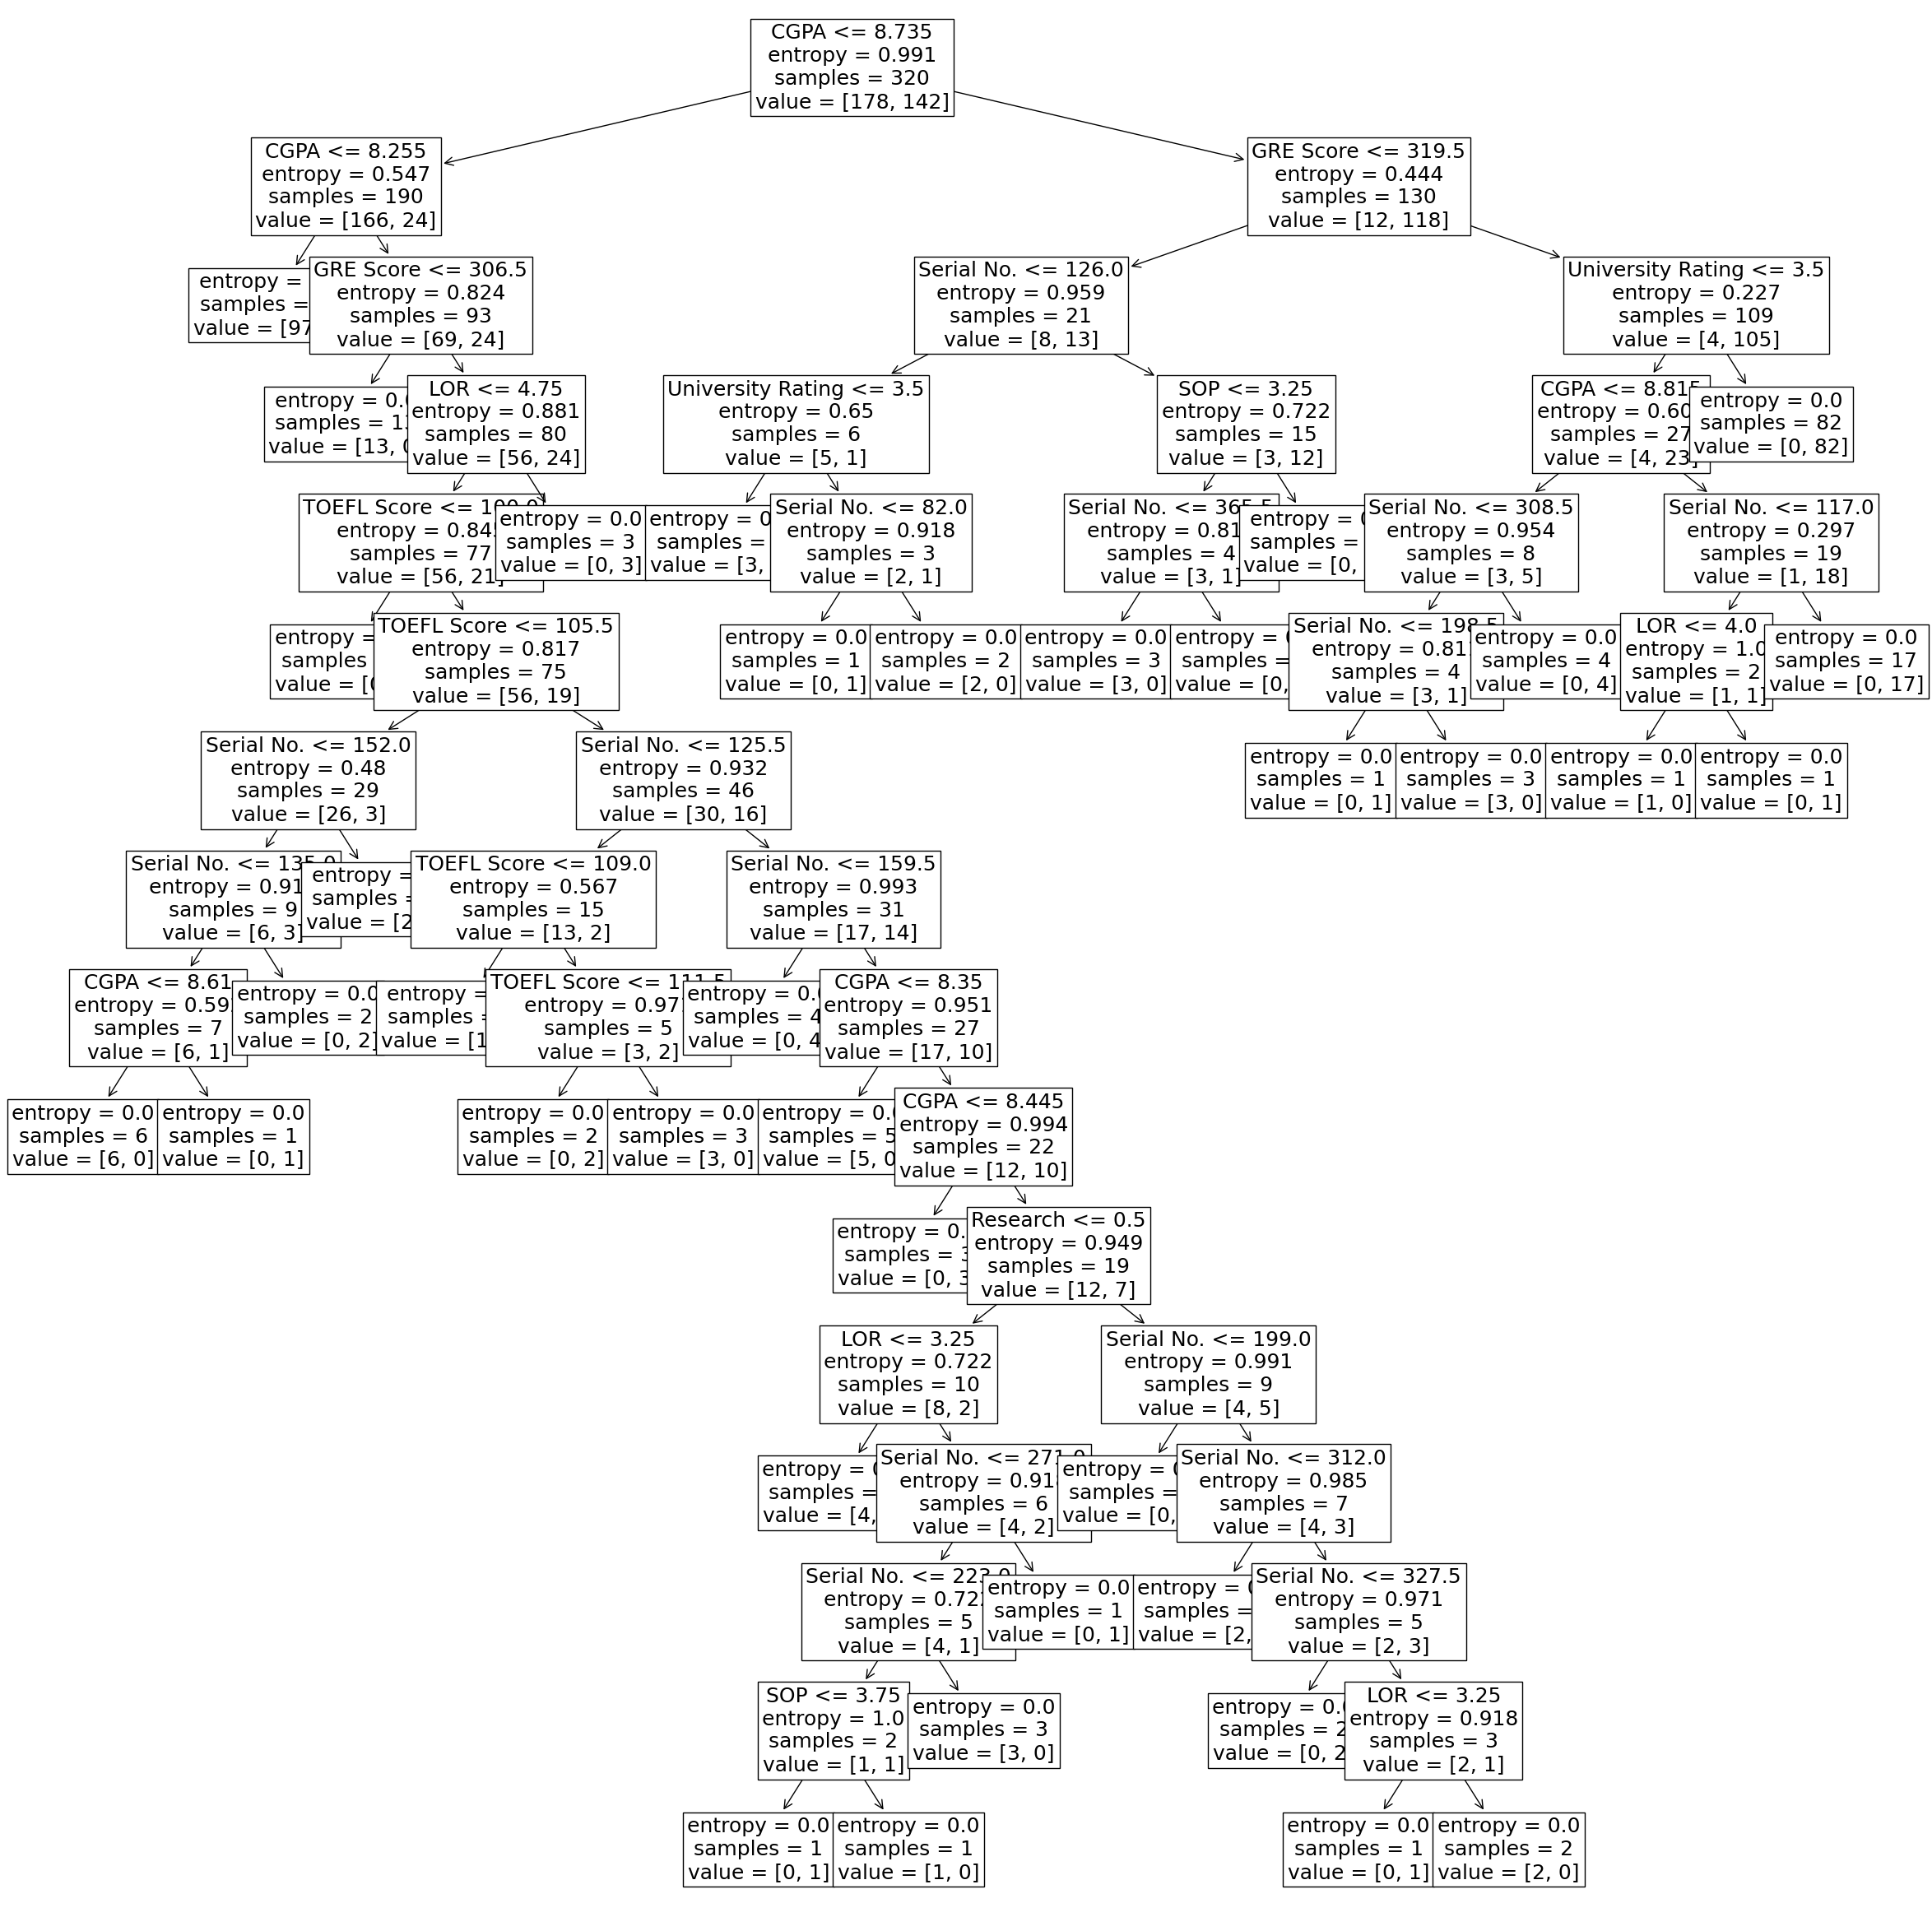

In [46]:
labels=x_train.columns
plt.figure(figsize=(30,30))
tree.plot_tree(decision_model,feature_names=labels,fontsize=18) # note in faculty note book
plt.show()

In [67]:
tuned_parameters=[{'criterion':['entropy','gini'],
                  'max_depth':range(2,10),
                  'max_features':['sqrt','log2'],
                  'min_samples_split':range(2,10),
                  'min_samples_leaf':range(2,10),
                  'max_leaf_nodes':range(2,10)}
                 ]

In [68]:
decision_tree_model=DecisionTreeClassifier(random_state=10)
Dtree_Gridsearch=GridSearchCV(param_grid=tuned_parameters,estimator=decision_tree_model,cv=5)
dtree_model=Dtree_Gridsearch.fit(x_train,y_train)
print('optional parameters',dtree_model.best_params_)

optional parameters {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [69]:
Dtree_Gridsearch

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(2, 10),
                          'max_features': ['sqrt', 'log2'],
                          'max_leaf_nodes': range(2, 10),
                          'min_samples_leaf': range(2, 10),
                          'min_samples_split': range(2, 10)}])

In [72]:
dtree_model=DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features='sqrt',max_leaf_nodes=5,min_samples_leaf=4,min_samples_split=2,random_state=10)

In [74]:
dtree_model=dtree_model.fit(x_train,y_train)

In [76]:
print(get_train_report(dtree_model))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       178
           1       0.96      0.74      0.84       142

    accuracy                           0.87       320
   macro avg       0.89      0.86      0.87       320
weighted avg       0.89      0.87      0.87       320



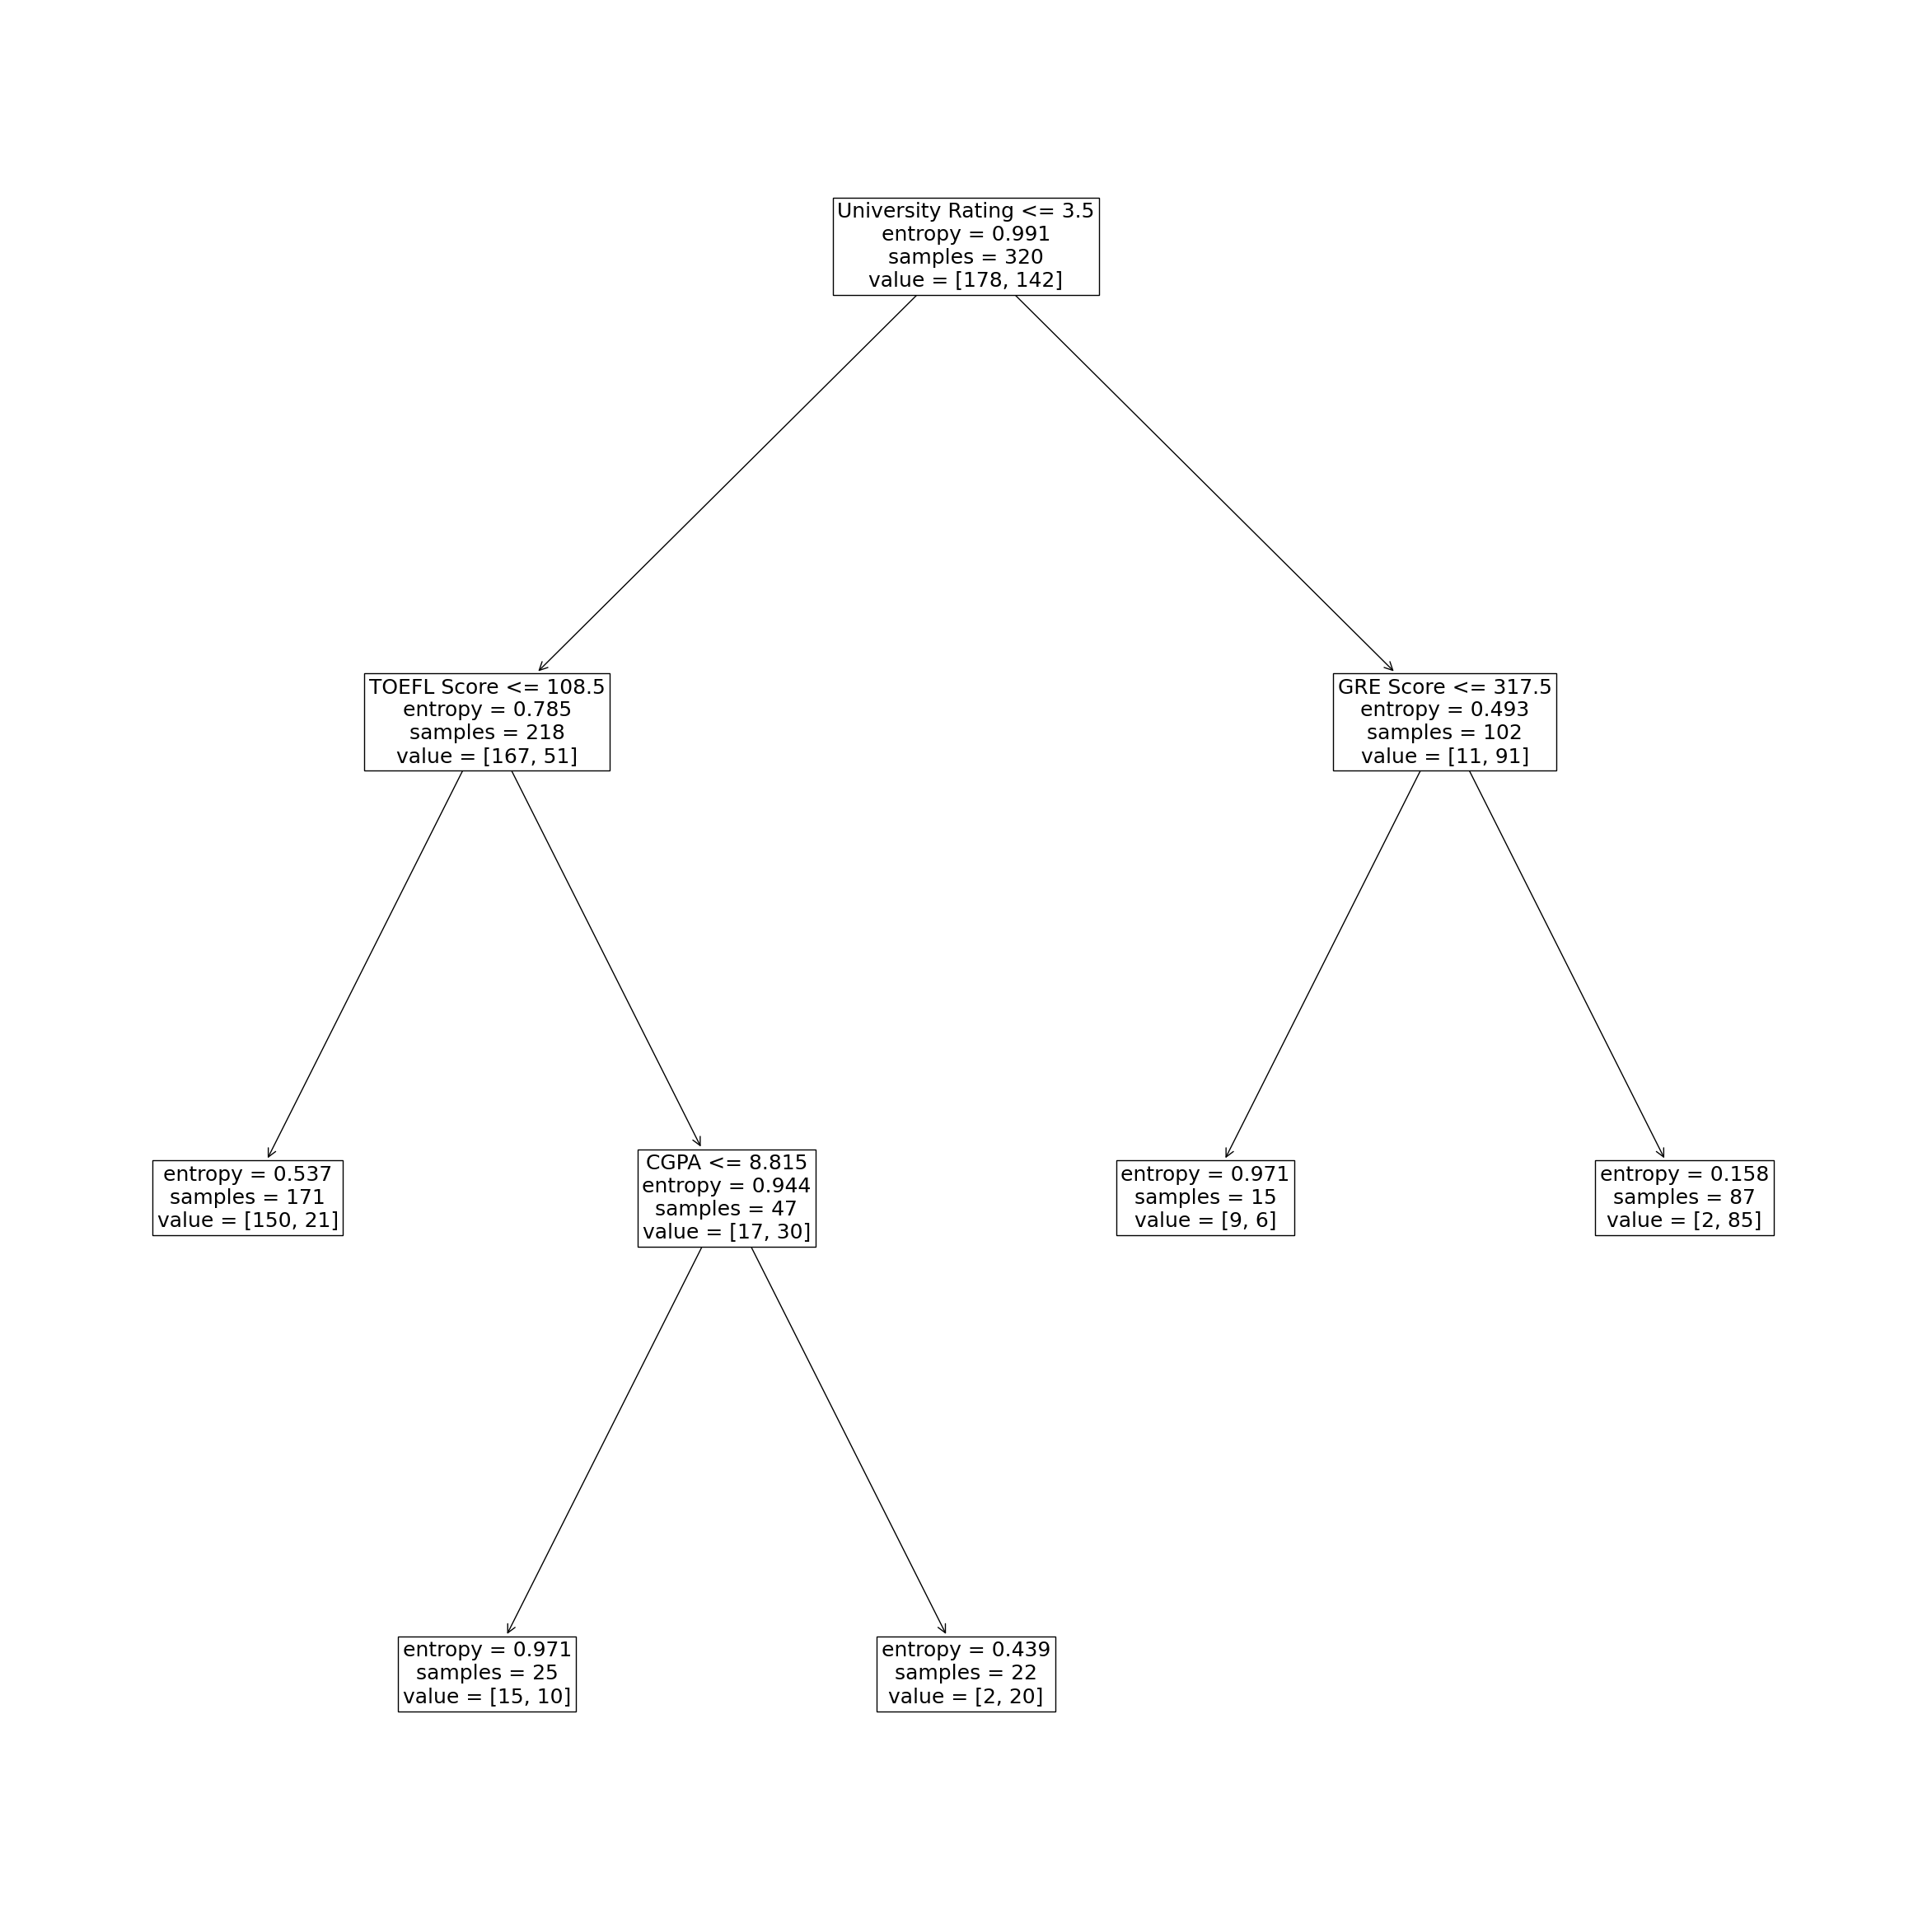

In [77]:
plt.figure(figsize=(30,30))
tree.plot_tree(dtree_model,feature_names=labels,fontsize=18) # note in faculty note book
plt.show()

<Axes: >

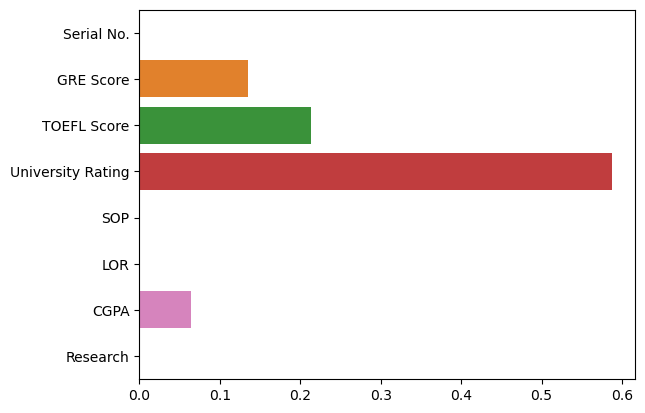

In [86]:
sns.barplot(x=dtree_model.feature_importances_,y=x_train.columns)

In [90]:
tuned_parameters=[{'criterion':['entropy','gini'],
                   'n_estimators':[10,20,30,40,50],
                  'max_depth':range(2,10),
                  'max_features':['sqrt','log2'],
                  'min_samples_split':range(2,10),
                  'min_samples_leaf':range(2,10),
                  'max_leaf_nodes':range(2,10)}
                 ]

In [ ]:
## random forest 
rf_model=RandomForestClassifier(n_estimators=10,random_state=10)
rf_model=GridSearchCV(estimator=rf_model,param_grid=tuned_parameters,cv=5)
rf_model=rf_model.fit(x_train,y_train)


In [ ]:
print(rf_model.best_params_)

In [ ]:
labels=x_train.columns
subset_estimators=rf_model.estimators[:5] ## plotting first five trees
for i , tree in enumerate(subset_estimators):
    plt.figure(figsize=(10,10))
    plt.title(f"Tree{i+1}")
    plot_tree(tree,feature_names=labels,class_names)
    plt.show()
          